In [10]:
# Importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn import datasets
from sklearn.preprocessing import scale

from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/USArrests.csv', index_col=0)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


### Pregunta 1

Realice una pequeña descripción estadística de las variables. ¿se justifica o no una estandarización de las variables cuantitativas?.


**Sí, se justifica la normalización de variables. Esto es porque tanto su rango como, medias y varianzas son suficiente disímiles entre sí. Al observar el cuadro de resumen y boxplot se notan claramente estas diferencias.**

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


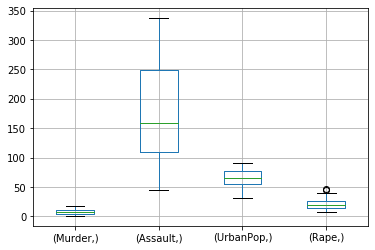

In [12]:
X = df
X.columns = [df.columns.tolist()]

X.boxplot() 
X.describe()

In [25]:
#normalización

def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

X2 = mean_norm(X)
X2.columns = X.columns

print(X2.head(3))

X3 = scale(X)
print(X3[:3,:])

X2

           Murder   Assault  UrbanPop      Rape
Alabama  1.242564  0.782839 -0.520907 -0.003416
Alaska   0.507862  1.106823 -1.211764  2.484203
Arizona  0.071633  1.478803  0.998980  1.042878
[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]]


,Murder,Assault,UrbanPop,Rape
Alabama,1.242564,0.782839,-0.520907,-0.003416
Alaska,0.507862,1.106823,-1.211764,2.484203
Arizona,0.071633,1.478803,0.998980,1.042878
Arkansas,0.232349,0.230868,-1.073593,-0.184917
California,0.278268,1.262814,1.758923,2.067820
Colorado,0.025715,0.398859,0.860809,1.864967
Connecticut,-1.030419,-0.729082,0.791723,-1.081741
Delaware,-0.433474,0.806838,0.446294,-0.579946
Florida,1.747671,1.970778,0.998980,1.138967
Georgia,2.206860,0.482855,-0.382735,0.487702


### Pregunta 2

2. Considere que buscar realizar 3 grupos con el conjunto de datos anterior:

(a) (10 pts) Agrupar los observaciones mediante enlace simple, completo y ward, junto con las métricas Euclidiana y Manhattan. Visualice los agrupamiento mediante sus respectivos dendrograma.


In [14]:
dist1 = pairwise_distances(X=X2,  metric ='euclidean')
dist2 = pairwise_distances(X=X2,  metric ='manhattan')

print(dist1*dist1)
print(dist1)
print(dist2)


[[8.88178420e-16 7.31028609e+00 5.26023278e+00 ... 9.76154469e+00
  1.22831536e+01 3.34561684e+00]
 [7.31028609e+00 0.00000000e+00 7.29347205e+00 ... 2.02541021e+01
  2.37281444e+01 1.22454199e+01]
 [5.26023278e+00 7.29347205e+00 0.00000000e+00 ... 2.02267773e+01
  1.55439896e+01 7.24849420e+00]
 ...
 [9.76154469e+00 2.02541021e+01 2.02267773e+01 ... 0.00000000e+00
  4.12451010e+00 3.54252609e+00]
 [1.22831536e+01 2.37281444e+01 1.55439896e+01 ... 4.12451010e+00
  0.00000000e+00 3.04375685e+00]
 [3.34561684e+00 1.22454199e+01 7.24849420e+00 ... 3.54252609e+00
  3.04375685e+00 0.00000000e+00]]
[[2.98023224e-08 2.70375407e+00 2.29351974e+00 ... 3.12434708e+00
  3.50473302e+00 1.82910274e+00]
 [2.70375407e+00 0.00000000e+00 2.70064290e+00 ... 4.50045577e+00
  4.87115432e+00 3.49934563e+00]
 [2.29351974e+00 2.70064290e+00 0.00000000e+00 ... 4.49741896e+00
  3.94258666e+00 2.69230277e+00]
 ...
 [3.12434708e+00 4.50045577e+00 4.49741896e+00 ... 0.00000000e+00
  2.03088899e+00 1.88215995e+00]

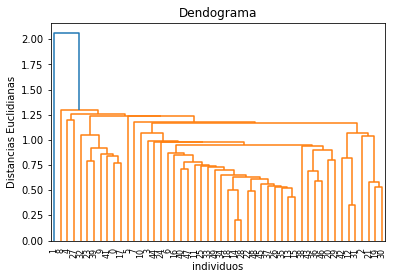

In [15]:
dendrogram1 = sch.dendrogram(sch.linkage(X2, method='single'))

plt.title('Dendograma')
plt.xlabel('individuos')
plt.ylabel('Distancias Euclidianas')
plt.show()

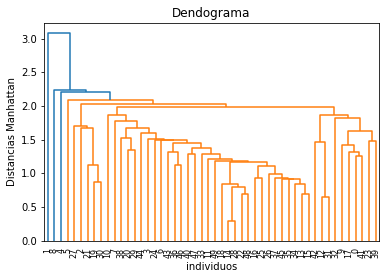

In [16]:
dendrogram1 = sch.dendrogram(sch.linkage(X2, method='single', metric='cityblock'))

plt.title('Dendograma')
plt.xlabel('individuos')
plt.ylabel('Distancias Manhattan')
plt.show()

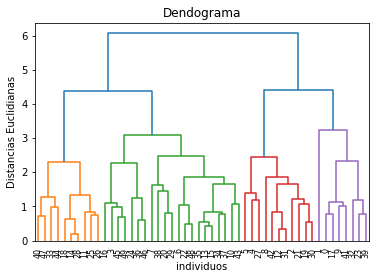

In [17]:
dendrogram2 = sch.dendrogram(sch.linkage(X2, method='complete'))

plt.title('Dendograma')
plt.xlabel('individuos')
plt.ylabel('Distancias Euclidianas')
plt.show()

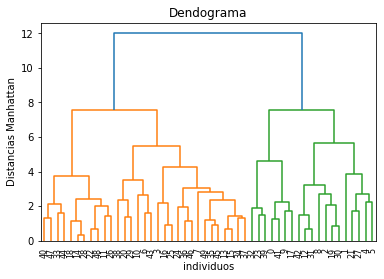

In [18]:
dendrogram1 = sch.dendrogram(sch.linkage(X2, method='complete', metric='cityblock'))

plt.title('Dendograma')
plt.xlabel('individuos')
plt.ylabel('Distancias Manhattan')
plt.show()

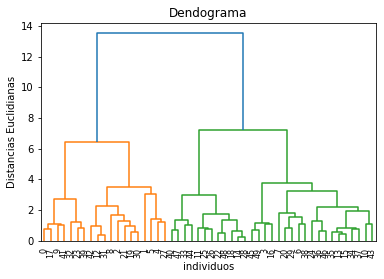

In [19]:
dendrogram2 = sch.dendrogram(sch.linkage(X2, method='ward'))

plt.title('Dendograma')
plt.xlabel('individuos')
plt.ylabel('Distancias Euclidianas')
plt.show()

(b) (5 pts) Escoja uno de los métodos aglomerativos (métrica y enlace), con este, crear los 3 grupos y comparar los clúster obtenidos, en términos de promedio y desviación estándar.



In [30]:
hc = AgglomerativeClustering(n_clusters = 3, 
                    affinity = 'manhattan', 
                    linkage = 'complete')

y_hc = hc.fit_predict(X2)

X2['cluster'] = y_hc

X2.groupby('cluster')


ValueError: Grouper for 'cluster' not 1-dimensional

In [ ]:
sklearn.__verion__

In [ ]:
(c) (10 pts) Realice un agrupamiento considerando 3 grupos utilizando la técnica K-medias.
Comparar los clúster obtenidos, en términos de promedio y desviación estándar.
